# Photon sieve

Lentes con agujeritos

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize']=10,10
rcParams['font.size']=14

In [4]:
from diffractio import degrees, mm, np, plt, sp, um
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.utils_math import fft_convolution2d, nearest, nearest2

number of processors: 8


In [34]:
length = 500*um 
num_data = 1024
wavelength = 0.850 * um
hole_diameter= 5*um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

hole = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
hole.circle(
    r0=(0 * um, 0 * um),
    radius=(hole_diameter/2, hole_diameter/2),
    angle=0 * degrees);

In [72]:
photon_sieve = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

In [73]:
num_holes_x=30
num_holes_y=30
x_pos=np.linspace(-length/2, length/2, num_holes_x)
y_pos=np.linspace(-length/2, length/2, num_holes_y)

x_pos, y_pos = np.meshgrid(x_pos,y_pos)
x_pos=x_pos.flatten()
y_pos=y_pos.flatten()

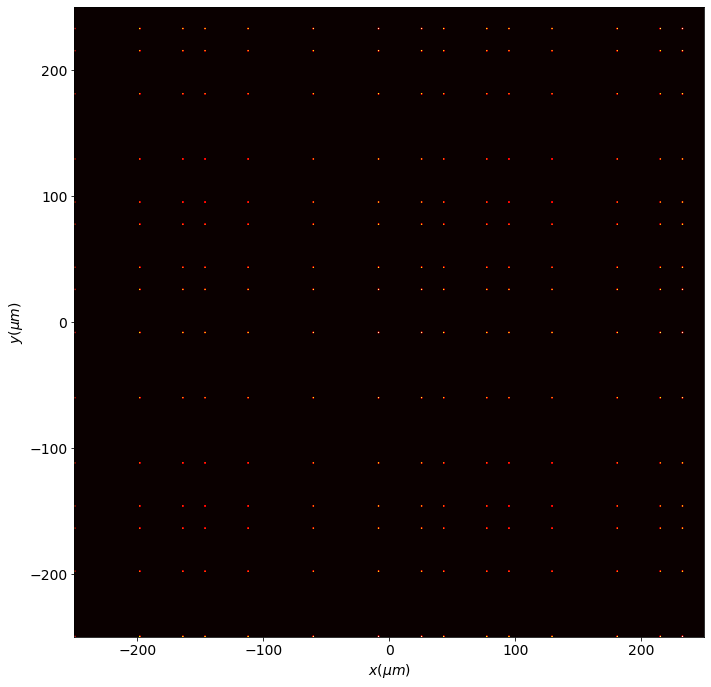

In [74]:
for i,xi in enumerate(x_pos):
    i_hole,_,_=nearest(x0,xi)
    for j,yj in enumerate(y_pos):
        j_hole,_,_=nearest(y0,yj)
        photon_sieve.u[i_hole,j_hole]=1


#photon_sieve.u=fft_convolution2d(photon_sieve.u, hole.u)
photon_sieve.draw();

In [100]:
focal=10*mm

fresnel_lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
fresnel_lens.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(length/2,length/2),
    focal=(focal,focal),
    angle=0 * degrees,
    mask=True,
    kind='amplitude');

In [ ]:
import py_aocg
from py_aocg.photon_sieve import np

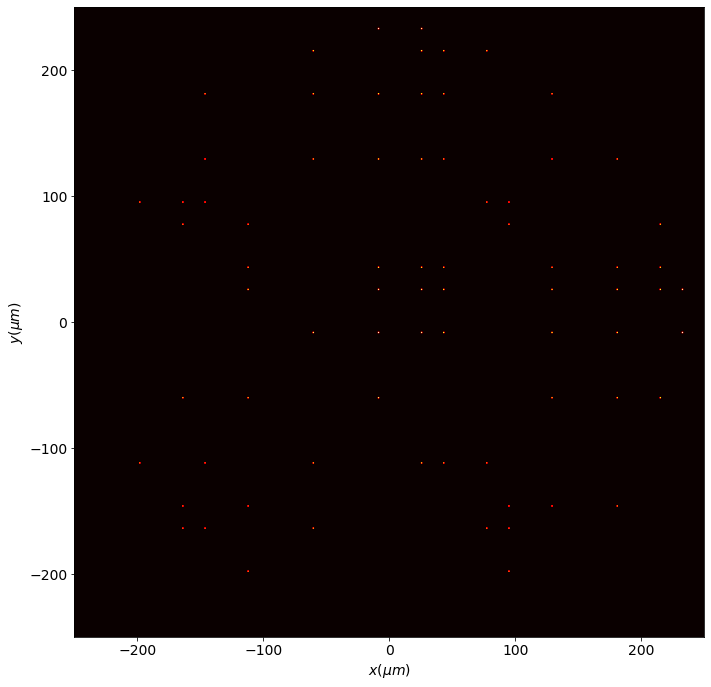

In [101]:
lens_sieve=fresnel_lens*photon_sieve
lens_sieve.draw();

In [110]:
size_focus=150*um
focal_lens_sieve=lens_sieve.RS(z=focal, new_field=True)
focal_lens_sieve.cut_resample(x_limits=[-size_focus,size_focus], y_limits=[-size_focus,size_focus],
                              num_points=[1024,1024])

In [111]:
focal_lens=fresnel_lens.RS(z=focal, new_field=True)
focal_lens.cut_resample(x_limits=[-size_focus,size_focus], y_limits=[-size_focus,size_focus],
                              num_points=[1024,1024])

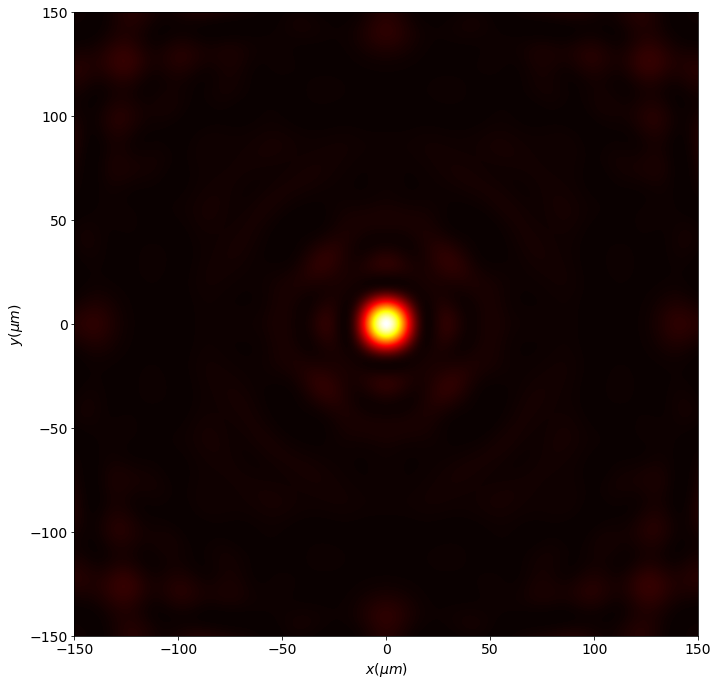

In [112]:
focal_lens_sieve.draw();

In [113]:
x_ps,I_ps,_,_=focal_lens_sieve.profile([-size_focus,0],[size_focus,0],1024)

In [120]:
x_fl,I_fl,a,b=focal_lens.profile([-size_focus,0],[size_focus,0],1024)

normalization factor = 2111286.25


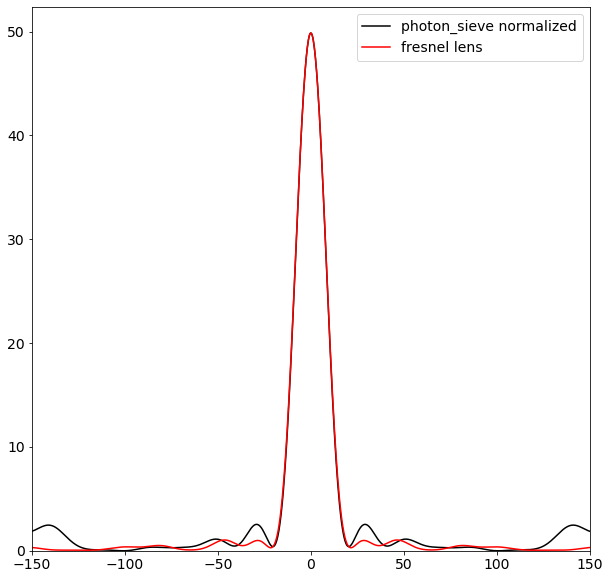

In [134]:
dx1=2*size_focus/1024

norm_factor=I_fl.max()/I_ps.max()

plt.figure()
plt.plot((x_ps-x_ps[-1]/2)*dx1,I_ps*norm_factor, 'k', label='photon_sieve normalized')
plt.plot((x_ps-x_ps[-1]/2)*dx1,I_fl, 'r', label='fresnel lens')
plt.legend();
plt.xlim(-size_focus,size_focus)
plt.ylim(bottom=0);

print("normalization factor = {:2.2f}".format(norm_factor))


In [139]:
np.real(fresnel_lens.u.sum()/photon_sieve.u.sum())**2

188996.93542716047

In [140]:
2111286.25/188996.93542716047

11.171007853795022